# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aditiya Ihzar Eka Prayogo
- **Email:** adit.ihzar@gmail.com
- **ID Dicoding:** aditPrayogo

## Menentukan Pertanyaan Bisnis

- Kapan waktu puncak peminjaman sepeda terjadi dalam sehari?
- Apa pengaruh cuaca dan suhu terhadap jumlah peminjam sepeda?
- Apakah hari kerja dan hari libur memengaruhi peminjaman?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [5]:
# Load Tabel Day
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Load Table Hour
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [7]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [8]:
# Checking missing values in hour_df
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# Check for missing values in day_df
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Check for duplicates in hour_df
print(f"Number of duplicate rows in hour_df: {hour_df.duplicated().sum()}")

Number of duplicate rows in hour_df: 0


In [11]:
# Checking missing values in day_df
print(f"Number of duplicate rows in day_df: {day_df.duplicated().sum()}")

Number of duplicate rows in day_df: 0


In [12]:
# Checking Statistical Summary hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
# Checking Statistical Summary day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [14]:
# Menghapus kolom yang tidak relevan
hour_df.drop(columns=['instant'], inplace=True)
day_df.drop(columns=['instant'], inplace=True)

In [15]:
# Mengubah kolom kategori ke tipe data kategorikal
kategori_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'hr']
for col in kategori_cols:
    if col in hour_df.columns:
        hour_df[col] = hour_df[col].astype('category')

for col in kategori_cols:
    if col in day_df.columns:
        day_df[col] = day_df[col].astype('category')

In [16]:
# Cek apakah total pengguna sesuai
assert (day_df['casual'] + day_df['registered'] == day_df['cnt']).all()
assert (hour_df['casual'] + hour_df['registered'] == hour_df['cnt']).all()

In [17]:
# Menggunakan IQR untuk mendeteksi outlier pada kolom cnt
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outliers = hour_df[(hour_df['cnt'] < Q1 - 1.5*IQR) | (hour_df['cnt'] > Q3 + 1.5*IQR)]
print(f"Jumlah outlier cnt: {len(outliers)}")

Jumlah outlier cnt: 505


In [18]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Cek duplikat berdasarkan tanggal & jam
duplicates = hour_df.duplicated(subset=['dteday', 'hr']).sum()
print(f'Duplikasi berdasarkan tanggal dan jam: {duplicates}')

Duplikasi berdasarkan tanggal dan jam: 0


In [19]:
hour_df['temp_celsius'] = hour_df['temp'] * 41

In [20]:
hour_df.rename(columns={'yr': 'year', 'mnth': 'month'}, inplace=True)

In [21]:
# Berapa banyak nilai windspeed = 0?
print((hour_df['windspeed'] == 0).sum())

2180


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [22]:
hour_df.describe(include='all')

,dteday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius
count,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,7.0,16.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,20.376474
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,13.940000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,20.500000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,27.060000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,41.000000


**Insight:**
- Dataset hour_df memiliki 17.379 baris data dengan cakupan waktu lengkap setiap jam selama dua tahun.
- Rata-rata peminjaman sepeda per jam adalah 35, dengan puncaknya mencapai 367 pengguna dalam satu jam tertentu.
- Terdapat indikasi data `windspeed` nol yang cukup banyak, kemungkinan merupakan anomali atau pengukuran yang hilang.

In [23]:
hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)

C:\Users\Aditiya Prayogo\AppData\Local\Temp\ipykernel_34124\2216178568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)


hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

**Insight:**
- Waktu puncak (jam tertinggi) peminjaman sepeda adalah jam 17 (pukul 5 sore), dengan rata-rata sekitar 461 peminjam.
- Disusul oleh jam 18 (pukul 6 sore) dan jam 8 pagi, yang juga menunjukkan aktivitas commuting (perjalanan kerja/sekolah).
- Jam dengan peminjaman paling rendah adalah jam 4 pagi, rata-rata hanya 6 pengguna.
- Pola ini menunjukkan dua puncak aktivitas: pagi hari (jam 8) dan sore hari (jam 17–18), sangat khas untuk pengguna commuter (pergi dan pulang kerja/sekolah).
- Aktivitas rendah terjadi dini hari (jam 1–5), kemungkinan karena kondisi gelap dan sepi.

In [24]:
hour_df.groupby('workingday')['cnt'].mean()

C:\Users\Aditiya Prayogo\AppData\Local\Temp\ipykernel_34124\2825494633.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('workingday')['cnt'].mean()


workingday
0    181.405332
1    193.207754
Name: cnt, dtype: float64

**Insight:**
- Rata-rata jumlah peminjaman sepeda **lebih tinggi pada hari kerja** (193 pengguna/jam) dibandingkan hari libur atau akhir pekan (181 pengguna/jam).
- Hal ini menunjukkan bahwa sepeda banyak digunakan untuk **aktivitas harian seperti pergi dan pulang kerja atau sekolah**.
- Meskipun selisihnya tidak terlalu besar, tren ini konsisten dengan pola commuter di kota besar.

In [25]:
hour_df.groupby('weathersit')['cnt'].mean()

C:\Users\Aditiya Prayogo\AppData\Local\Temp\ipykernel_34124\838405540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('weathersit')['cnt'].mean()


weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64

**Insight:**
- Jumlah peminjaman sepeda **tertinggi terjadi saat cuaca cerah atau sedikit berawan** (weathersit = 1), dengan rata-rata 204 pengguna per jam.
- Semakin buruk kondisi cuaca, semakin rendah rata-rata jumlah peminjam sepeda:
  - Cuaca dengan kabut atau mendung (weathersit = 2) turun menjadi 175.
  - Saat hujan ringan atau salju ringan (weathersit = 3), turun drastis menjadi 111.
  - Dan yang paling rendah pada cuaca ekstrem seperti hujan deras atau kabut tebal (weathersit = 4) hanya 74.
- **Cuaca sangat memengaruhi keputusan pengguna untuk menyewa sepeda**, yang wajar karena faktor kenyamanan dan keamanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu puncak peminjaman sepeda terjadi dalam sehari?

C:\Users\Aditiya Prayogo\AppData\Local\Temp\ipykernel_34124\713904347.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=hour_df, x='hr', y='cnt', estimator='mean', ci=None)


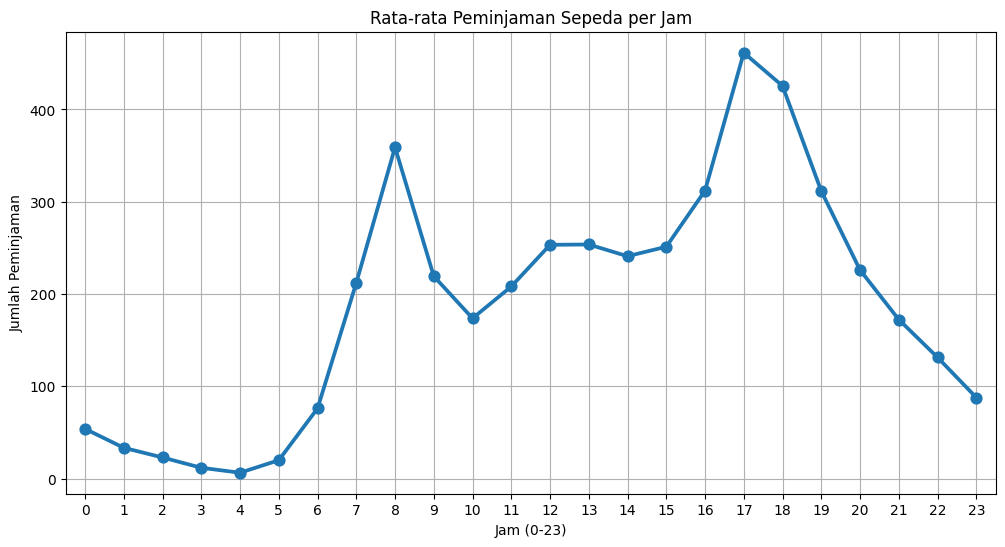

In [26]:
plt.figure(figsize=(12,6))
sns.pointplot(data=hour_df, x='hr', y='cnt', estimator='mean', ci=None)
plt.title('Rata-rata Peminjaman Sepeda per Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
1. Waktu puncak peminjaman terjadi pada jam 17:00 (pulang kerja), disusul oleh jam 18:00 dan jam 08:00 (berangkat kerja/sekolah).
2. Peminjaman sangat rendah pada dini hari (01:00–05:00), sesuai dengan waktu istirahat.

### Pertanyaan 2: Apa pengaruh cuaca dan suhu terhadap jumlah peminjam sepeda?

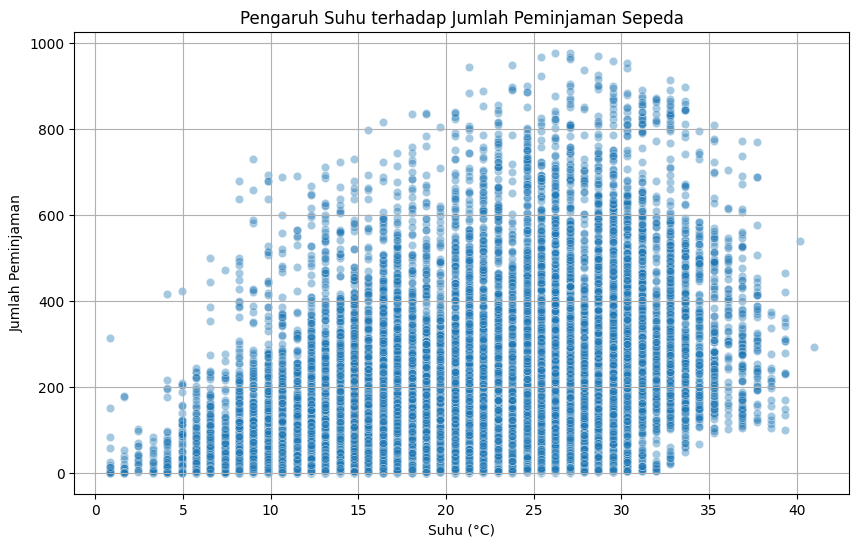

C:\Users\Aditiya Prayogo\AppData\Local\Temp\ipykernel_34124\3458280338.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hour_df, x='weathersit', y='cnt', estimator='mean', ci=None)


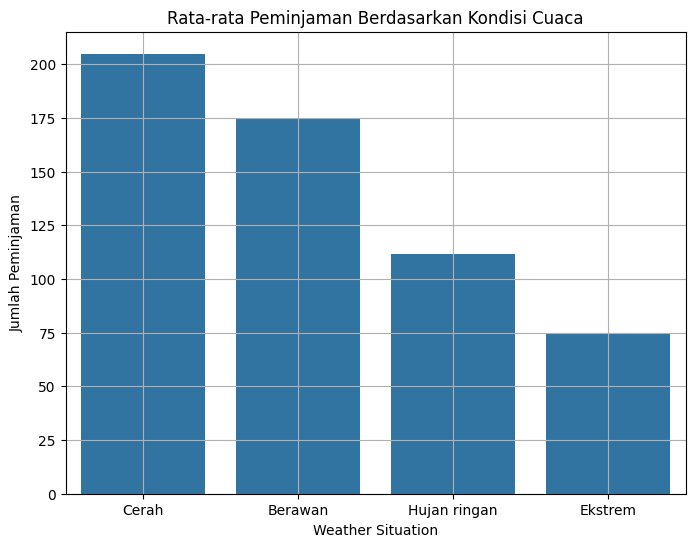

In [27]:
# Visualisasi A: Suhu vs Jumlah Peminjam
plt.figure(figsize=(10,6))
sns.scatterplot(data=hour_df, x='temp_celsius', y='cnt', alpha=0.4)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

# Visualisasi B: Kondisi Cuaca vs Jumlah Peminjam
plt.figure(figsize=(8,6))
sns.barplot(data=hour_df, x='weathersit', y='cnt', estimator='mean', ci=None)
plt.title('Rata-rata Peminjaman Berdasarkan Kondisi Cuaca')
plt.xlabel('Weather Situation')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Berawan', 'Hujan ringan', 'Ekstrem'])
plt.grid(True)
plt.show()

**Insight:**
- Peminjaman sepeda cenderung meningkat seiring suhu yang lebih hangat.
- Cuaca sangat memengaruhi penggunaan sepeda: paling tinggi saat cuaca cerah dan paling rendah saat cuaca ekstrem seperti hujan deras atau salju.

### Pertanyaan 3: Apakah hari kerja dan hari libur memengaruhi peminjaman?

C:\Users\Aditiya Prayogo\AppData\Local\Temp\ipykernel_34124\345888245.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hour_df, x='workingday', y='cnt', estimator='mean', ci=None)


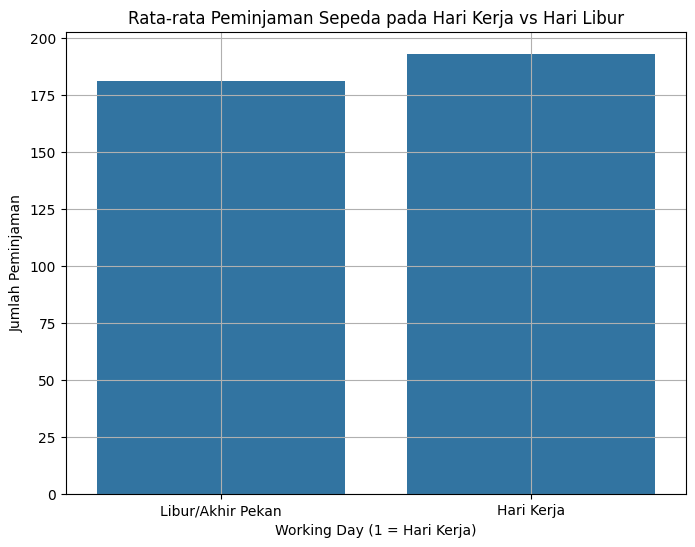

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(data=hour_df, x='workingday', y='cnt', estimator='mean', ci=None)
plt.title('Rata-rata Peminjaman Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Working Day (1 = Hari Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0,1], ['Libur/Akhir Pekan', 'Hari Kerja'])
plt.grid(True)
plt.show()

**Insight :**
- Rata-rata peminjaman sedikit lebih tinggi pada hari kerja dibandingkan hari libur.
- Ini menunjukkan bahwa sepeda kemungkinan besar digunakan untuk aktivitas rutin seperti ke kantor/sekolah.

## Analisis Lanjutan (Opsional)

**Clustering Peminjaman Sepeda Berdasarkan Jumlah cnt (Binning)**

In [29]:
def kategori_peminjaman(cnt):
    if cnt < 100:
        return 'Sepi'
    elif cnt <= 300:
        return 'Sedang'
    else:
        return 'Ramai'

hour_df['kategori_peminjaman'] = hour_df['cnt'].apply(kategori_peminjaman)

hour_df['kategori_peminjaman'].value_counts()

kategori_peminjaman
Sepi      7010
Sedang    6478
Ramai     3891
Name: count, dtype: int64

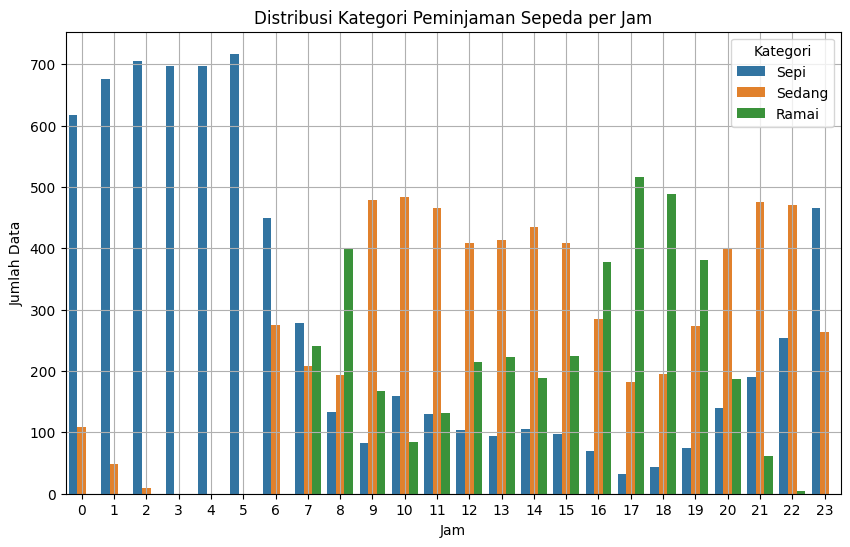

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=hour_df, x='hr', hue='kategori_peminjaman')
plt.title('Distribusi Kategori Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Data')
plt.legend(title='Kategori')
plt.grid(True)
plt.show()

**Insight:**
- Dengan metode binning, dapat dibentuk 3 cluster kategori: Sepi, Sedang, dan Ramai berdasarkan jumlah `cnt`.
- Jam-jam sibuk (kategori Ramai) terutama terjadi antara jam 07:00–09:00 dan 16:00–19:00.
- Jam dini hari (00:00–05:00) didominasi oleh kategori Sepi.
- Clustering ini membantu memetakan pola penggunaan sepeda yang bisa dimanfaatkan untuk pengambilan keputusan operasional.


**RFM Analysis**

In [31]:
# Pastikan dteday sudah datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Hitung total peminjaman per hari
rfm_df = hour_df.groupby('dteday').agg({
    'cnt': ['sum', 'count']
}).reset_index()
rfm_df.columns = ['dteday', 'monetary', 'frequency']

# Hitung recency (berapa hari sejak tanggal terakhir)
snapshot_date = hour_df['dteday'].max()
rfm_df['recency'] = (snapshot_date - rfm_df['dteday']).dt.days

# Skor 1–4 (semakin bagus nilainya, semakin tinggi skor)
rfm_df['R_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4,3,2,1])
rfm_df['F_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm_df['M_score'] = pd.qcut(rfm_df['monetary'], 4, labels=[1,2,3,4])

# Gabungkan jadi satu skor
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

rfm_df.head()

,dteday,monetary,frequency,recency,R_score,F_score,M_score,RFM_Score
0,2011-01-01,985,24,730,1,1,1,111
1,2011-01-02,801,23,729,1,1,1,111
2,2011-01-03,1349,22,728,1,1,1,111
3,2011-01-04,1562,23,727,1,1,1,111
4,2011-01-05,1600,23,726,1,1,1,111


## Conclusion

• Pertanyaan 1: Kapan waktu puncak peminjaman sepeda terjadi dalam sehari?
- Waktu puncak peminjaman terjadi pada jam 17:00 (pulang kerja), diikuti oleh jam 08:00 (berangkat kerja/sekolah).
- Aktivitas peminjaman sangat rendah pada dini hari (00:00–05:00).
- Pola ini menunjukkan bahwa sepeda paling banyak digunakan untuk aktivitas komuter harian.

• Pertanyaan 2: Apa pengaruh cuaca dan suhu terhadap jumlah peminjam sepeda?
- Suhu yang lebih tinggi (hangat) berkorelasi dengan peningkatan jumlah peminjam sepeda.
- Penggunaan sepeda tertinggi terjadi saat cuaca cerah, dan menurun tajam pada kondisi cuaca ekstrem seperti hujan deras atau kabut tebal.
- Ini menunjukkan bahwa kenyamanan cuaca berperan besar dalam keputusan menggunakan sepeda.

• Pertanyaan 3: Apakah hari kerja dan hari libur memengaruhi peminjaman?
- Rata-rata peminjaman lebih tinggi pada hari kerja dibandingkan hari libur.
- Ini mendukung asumsi bahwa sepeda sering digunakan sebagai alat transportasi utama untuk bekerja/sekolah, bukan hanya untuk rekreasi.


In [32]:
# Simpan hour_df ke CSV
hour_df.head()
hour_df.to_csv('hour_dashboard.csv', index=False)

# Simpan day_df ke CSV
day_df.head()
day_df.to_csv('day_dashboard.csv', index=False)